In [1]:
from typing import OrderedDict

import torch

from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.PCCMEve import PCCMEve
from typing import OrderedDict

import torch

from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.connection_elements.QCLEve import QCLEve

from plt_pab_fae import plt_fab_fae

In [2]:
def loss_f(self, target, mask, outputs):
    bob_Z = outputs["channel"][:, 0]
    eve_Z = outputs[self.eve.eve_clone.name][:, 0]

    sign = 1 - 2 * target.long()
    bob_f = 0.5 * (1 + sign * bob_Z)
    eve_f = 0.5 * (1 + sign * eve_Z)

    bob_f = bob_f[mask].mean()
    eve_f = eve_f[mask].mean()

    f_target = self.f_value

    loss = self.alpha * (bob_f - f_target).abs() - eve_f
    return loss

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


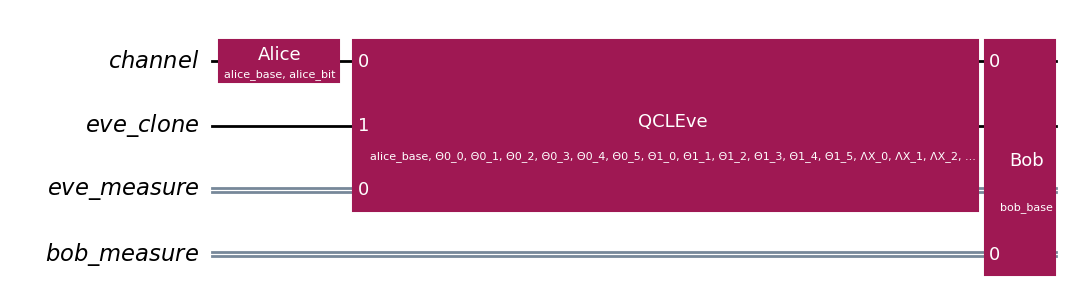

In [3]:
def get_pipeline(target_fab, alpha):
    pipeline = BB84EveTrainableProtocol(n_bits=128, elements=[QCLEve()], f_value=target_fab, alpha=alpha, seed=0, learning_rate=0.1, batch_size=64)
    pipeline.loss = lambda target, mask, output: loss_f(pipeline, target, mask, output)
    return pipeline

qc, _ = get_pipeline(1, 10).qc_with_ctx()
qc.draw("mpl")

In [4]:
def train(target_fab, alpha):
    bob_qber, eve_qber = [], []
    pipeline = get_pipeline(target_fab, alpha)
    for epoch in range(100):
        loss = pipeline.train()
        qber = pipeline.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')

    return pipeline, bob_qber, eve_qber

In [5]:
pipeline85, bob_qber, eve_qber = train(0.853, 10)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 0.3204136788845062, QBER: {'bob_qber': np.float64(0.06349206349206349), 'eve_qber': np.float64(0.6031746031746033)}
epoch: 5, loss: -0.6062532067298889, QBER: {'bob_qber': np.float64(0.12698412698412698), 'eve_qber': np.float64(0.3650793650793651)}
epoch: 10, loss: -0.5854529142379761, QBER: {'bob_qber': np.float64(0.15873015873015872), 'eve_qber': np.float64(0.17460317460317465)}
epoch: 15, loss: -0.7200723886489868, QBER: {'bob_qber': np.float64(0.1428571428571429), 'eve_qber': np.float64(0.15873015873015872)}
epoch: 20, loss: -0.800777792930603, QBER: {'bob_qber': np.float64(0.12698412698412698), 'eve_qber': np.float64(0.15873015873015872)}
epoch: 25, loss: -0.7964253425598145, QBER: {'bob_qber': np.float64(0.15873015873015872), 'eve_qber': np.float64(0.1428571428571429)}
epoch: 30, loss: -0.6946471333503723, QBER: {'bob_qber': np.float64(0.07936507936507942), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 35, loss: -0.7183687686920166, QBER: {'bob_qber': np.flo

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

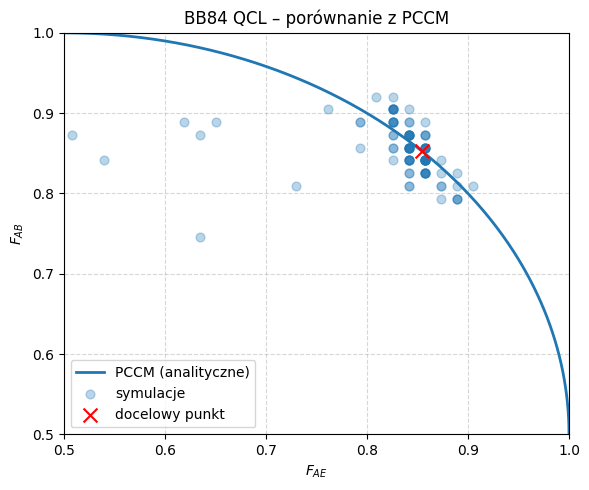

In [6]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.853)

In [7]:
pipeline95, bob_qber, eve_qber = train(0.95, 10)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 1.8827869892120361, QBER: {'bob_qber': np.float64(0.2063492063492064), 'eve_qber': np.float64(0.39682539682539686)}
epoch: 5, loss: -0.4543021023273468, QBER: {'bob_qber': np.float64(0.06349206349206349), 'eve_qber': np.float64(0.4126984126984127)}
epoch: 10, loss: -0.48954498767852783, QBER: {'bob_qber': np.float64(0.04761904761904767), 'eve_qber': np.float64(0.38095238095238093)}
epoch: 15, loss: -0.5987259149551392, QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.39682539682539686)}
epoch: 20, loss: -0.6729940176010132, QBER: {'bob_qber': np.float64(0.031746031746031744), 'eve_qber': np.float64(0.33333333333333337)}
epoch: 25, loss: -0.684258759021759, QBER: {'bob_qber': np.float64(0.04761904761904767), 'eve_qber': np.float64(0.2857142857142857)}
epoch: 30, loss: -0.660020112991333, QBER: {'bob_qber': np.float64(0.031746031746031744), 'eve_qber': np.float64(0.3015873015873016)}
epoch: 35, loss: -0.6597282886505127, QBER: {'bob_qber': np.float64(0.0317460

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

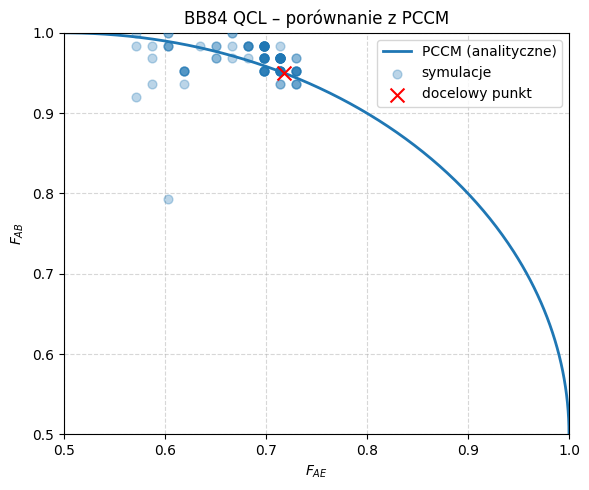

In [8]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.95)

In [9]:
pipeline75, bob_qber, eve_qber = train(0.75, 10)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 0.37604498863220215, QBER: {'bob_qber': np.float64(0.15873015873015872), 'eve_qber': np.float64(0.6031746031746033)}
epoch: 5, loss: -0.4281326234340668, QBER: {'bob_qber': np.float64(0.19047619047619047), 'eve_qber': np.float64(0.4285714285714286)}
epoch: 10, loss: -0.5710434913635254, QBER: {'bob_qber': np.float64(0.2698412698412699), 'eve_qber': np.float64(0.2698412698412699)}
epoch: 15, loss: -0.720928430557251, QBER: {'bob_qber': np.float64(0.25396825396825395), 'eve_qber': np.float64(0.17460317460317465)}
epoch: 20, loss: -0.7707465887069702, QBER: {'bob_qber': np.float64(0.2857142857142857), 'eve_qber': np.float64(0.15873015873015872)}
epoch: 25, loss: -0.5853638052940369, QBER: {'bob_qber': np.float64(0.23809523809523814), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 30, loss: -0.8183208703994751, QBER: {'bob_qber': np.float64(0.23809523809523814), 'eve_qber': np.float64(0.1428571428571429)}
epoch: 35, loss: -0.8765718936920166, QBER: {'bob_qber': np.floa

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

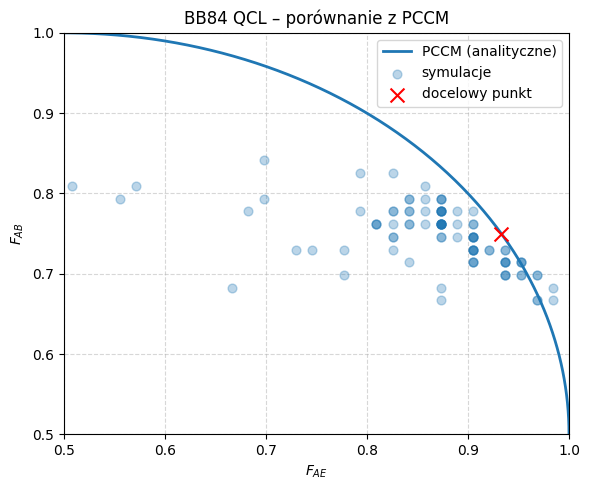

In [10]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.75)

In [11]:
pipeline85, bob_qber, eve_qber = train(0.853, 25)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 1.1427046060562134, QBER: {'bob_qber': np.float64(0.3015873015873016), 'eve_qber': np.float64(0.6507936507936508)}
epoch: 5, loss: 1.2012563943862915, QBER: {'bob_qber': np.float64(0.2063492063492064), 'eve_qber': np.float64(0.31746031746031744)}
epoch: 10, loss: -0.11809051036834717, QBER: {'bob_qber': np.float64(0.07936507936507942), 'eve_qber': np.float64(0.3492063492063492)}
epoch: 15, loss: 0.04336223006248474, QBER: {'bob_qber': np.float64(0.1428571428571429), 'eve_qber': np.float64(0.2698412698412699)}
epoch: 20, loss: -0.4876801073551178, QBER: {'bob_qber': np.float64(0.09523809523809523), 'eve_qber': np.float64(0.2857142857142857)}
epoch: 25, loss: -0.5197490453720093, QBER: {'bob_qber': np.float64(0.2222222222222222), 'eve_qber': np.float64(0.2063492063492064)}
epoch: 30, loss: -0.6722002029418945, QBER: {'bob_qber': np.float64(0.17460317460317465), 'eve_qber': np.float64(0.2222222222222222)}
epoch: 35, loss: -0.7137190103530884, QBER: {'bob_qber': np.float64(

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

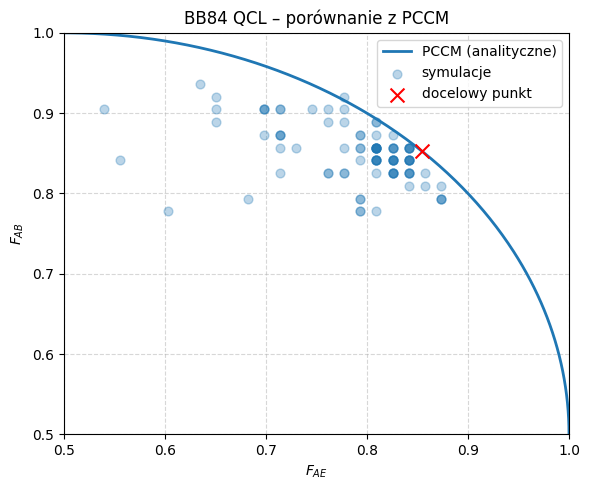

In [12]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.853)

In [13]:
pipeline85, bob_qber, eve_qber = train(0.95, 25)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 3.2050559520721436, QBER: {'bob_qber': np.float64(0.09523809523809523), 'eve_qber': np.float64(0.3492063492063492)}
epoch: 5, loss: -0.4144743084907532, QBER: {'bob_qber': np.float64(0.09523809523809523), 'eve_qber': np.float64(0.4285714285714286)}
epoch: 10, loss: -0.22255778312683105, QBER: {'bob_qber': np.float64(0.04761904761904767), 'eve_qber': np.float64(0.46031746031746035)}
epoch: 15, loss: -0.46692079305648804, QBER: {'bob_qber': np.float64(0.06349206349206349), 'eve_qber': np.float64(0.39682539682539686)}
epoch: 20, loss: -0.4836476147174835, QBER: {'bob_qber': np.float64(0.04761904761904767), 'eve_qber': np.float64(0.3492063492063492)}
epoch: 25, loss: -0.5616364479064941, QBER: {'bob_qber': np.float64(0.015873015873015928), 'eve_qber': np.float64(0.3492063492063492)}
epoch: 30, loss: -0.5558202266693115, QBER: {'bob_qber': np.float64(0.015873015873015928), 'eve_qber': np.float64(0.3492063492063492)}
epoch: 35, loss: -0.5604389905929565, QBER: {'bob_qber': np

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

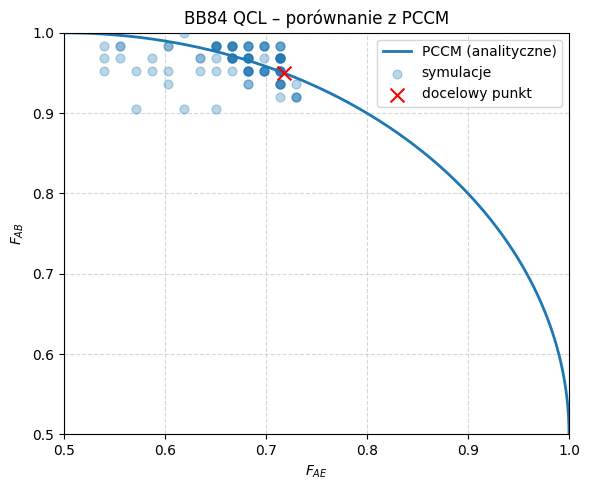

In [14]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.95)

In [15]:
pipeline75, bob_qber, eve_qber = train(0.75, 25)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: 1.1298619508743286, QBER: {'bob_qber': np.float64(0.1428571428571429), 'eve_qber': np.float64(0.46031746031746035)}
epoch: 5, loss: -0.5895642042160034, QBER: {'bob_qber': np.float64(0.25396825396825395), 'eve_qber': np.float64(0.1428571428571429)}
epoch: 10, loss: -0.0023368000984191895, QBER: {'bob_qber': np.float64(0.2698412698412699), 'eve_qber': np.float64(0.1428571428571429)}
epoch: 15, loss: -0.3770310580730438, QBER: {'bob_qber': np.float64(0.2857142857142857), 'eve_qber': np.float64(0.07936507936507942)}
epoch: 20, loss: -0.027838975191116333, QBER: {'bob_qber': np.float64(0.2698412698412699), 'eve_qber': np.float64(0.09523809523809523)}
epoch: 25, loss: -0.46482232213020325, QBER: {'bob_qber': np.float64(0.2222222222222222), 'eve_qber': np.float64(0.09523809523809523)}
epoch: 30, loss: -0.15967139601707458, QBER: {'bob_qber': np.float64(0.25396825396825395), 'eve_qber': np.float64(0.09523809523809523)}
epoch: 35, loss: -0.4276674687862396, QBER: {'bob_qber': n

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

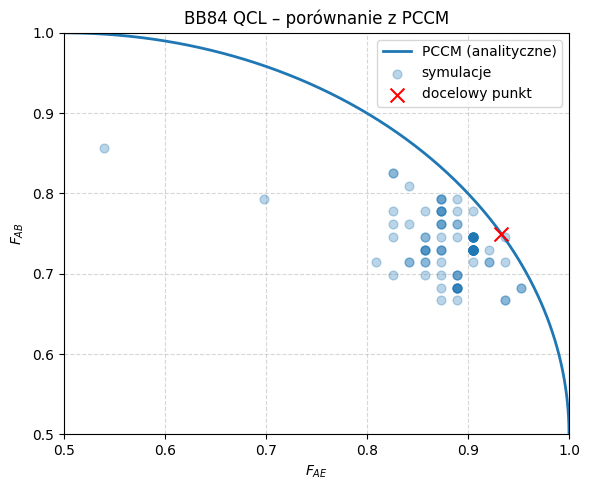

In [16]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.75)

In [17]:
pipeline85, bob_qber, eve_qber = train(0.853, 1)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: -0.3911302089691162, QBER: {'bob_qber': np.float64(0.19047619047619047), 'eve_qber': np.float64(0.4444444444444444)}
epoch: 5, loss: -0.7846777439117432, QBER: {'bob_qber': np.float64(0.2222222222222222), 'eve_qber': np.float64(0.17460317460317465)}
epoch: 10, loss: -0.8432602882385254, QBER: {'bob_qber': np.float64(0.17460317460317465), 'eve_qber': np.float64(0.11111111111111116)}
epoch: 15, loss: -0.8572786450386047, QBER: {'bob_qber': np.float64(0.11111111111111116), 'eve_qber': np.float64(0.17460317460317465)}
epoch: 20, loss: -0.8588535785675049, QBER: {'bob_qber': np.float64(0.12698412698412698), 'eve_qber': np.float64(0.1428571428571429)}
epoch: 25, loss: -0.861077070236206, QBER: {'bob_qber': np.float64(0.17460317460317465), 'eve_qber': np.float64(0.12698412698412698)}
epoch: 30, loss: -0.8638414740562439, QBER: {'bob_qber': np.float64(0.15873015873015872), 'eve_qber': np.float64(0.11111111111111116)}
epoch: 35, loss: -0.8583462238311768, QBER: {'bob_qber': np.f

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

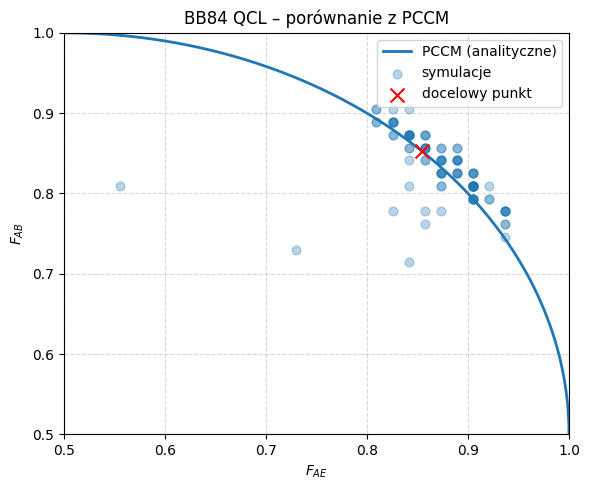

In [18]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.853)

In [19]:
pipeline95, bob_qber, eve_qber = train(0.95, 1)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: -0.29226577281951904, QBER: {'bob_qber': np.float64(0.07936507936507942), 'eve_qber': np.float64(0.4920634920634921)}
epoch: 5, loss: -0.7078790664672852, QBER: {'bob_qber': np.float64(0.1428571428571429), 'eve_qber': np.float64(0.2063492063492064)}
epoch: 10, loss: -0.7479358911514282, QBER: {'bob_qber': np.float64(0.12698412698412698), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 15, loss: -0.7619920969009399, QBER: {'bob_qber': np.float64(0.09523809523809523), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 20, loss: -0.7682691812515259, QBER: {'bob_qber': np.float64(0.09523809523809523), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 25, loss: -0.7668604850769043, QBER: {'bob_qber': np.float64(0.07936507936507942), 'eve_qber': np.float64(0.19047619047619047)}
epoch: 30, loss: -0.7707688808441162, QBER: {'bob_qber': np.float64(0.12698412698412698), 'eve_qber': np.float64(0.15873015873015872)}
epoch: 35, loss: -0.7676781415939331, QBER: {'bob_qber': np

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

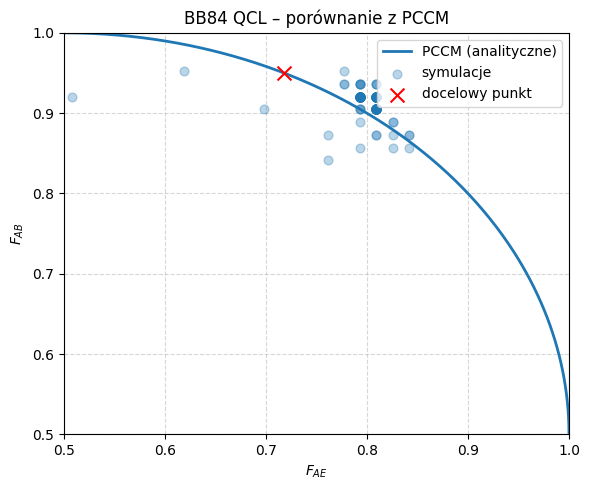

In [20]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.95)

In [21]:
pipeline75, bob_qber, eve_qber = train(0.75, 1)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


epoch: 0, loss: -0.4136278033256531, QBER: {'bob_qber': np.float64(0.2857142857142857), 'eve_qber': np.float64(0.4444444444444444)}
epoch: 5, loss: -0.8005593419075012, QBER: {'bob_qber': np.float64(0.23809523809523814), 'eve_qber': np.float64(0.12698412698412698)}
epoch: 10, loss: -0.8990643620491028, QBER: {'bob_qber': np.float64(0.3015873015873016), 'eve_qber': np.float64(0.04761904761904767)}
epoch: 15, loss: -0.9079428911209106, QBER: {'bob_qber': np.float64(0.33333333333333337), 'eve_qber': np.float64(0.04761904761904767)}
epoch: 20, loss: -0.9251834154129028, QBER: {'bob_qber': np.float64(0.2857142857142857), 'eve_qber': np.float64(0.031746031746031744)}
epoch: 25, loss: -0.9248241186141968, QBER: {'bob_qber': np.float64(0.2698412698412699), 'eve_qber': np.float64(0.04761904761904767)}
epoch: 30, loss: -0.9314472079277039, QBER: {'bob_qber': np.float64(0.31746031746031744), 'eve_qber': np.float64(0.031746031746031744)}
epoch: 35, loss: -0.9079423546791077, QBER: {'bob_qber': np.

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

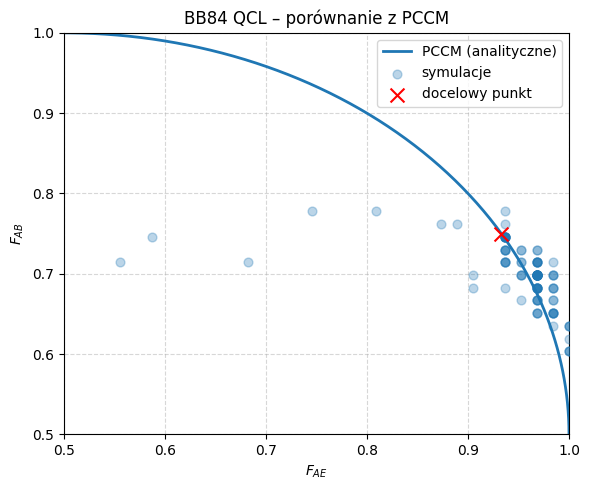

In [22]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.75)